Text(3.46, 38.09999999999818, '$slope=\\frac{r_m \\beta_T}{4}$')

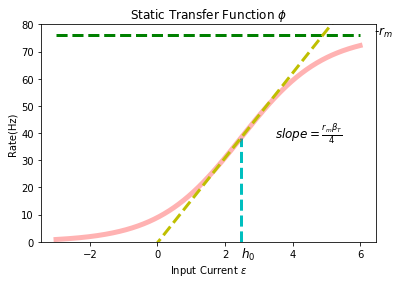

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
phi=np.zeros(900)
count=0
for epsilon in np.arange(-3,6,0.01):
    phi[count]=r_m/(1+np.exp(-beta_T*(epsilon-h_0)))
    count=count+1
plt.figure()
plt.title("Static Transfer Function $\phi$")
plt.xlabel("Input Current $\epsilon$")
plt.ylabel("Rate(Hz)")
plt.ylim([0,80])
#plt.plot(np.arange(-3,6,0.01),phi_i)
plt.plot(np.arange(-3,6,0.01),phi,'-r',linewidth=5,alpha=0.3)
plt.vlines(h_0, 0,phi[int((h_0+3)/0.01)], colors = "c", linestyles = "dashed",linewidth=3)
plt.hlines(r_m,-3,6,colors='g',linestyles = "dashed",linewidth=3)
plt.text(6.4,r_m,'-$r_m$',size='12')
plt.text(h_0,-6,'$h_0$',size='12')
y_line=np.zeros(900)
count=0
slope=r_m*beta_T/4
for epsilon in np.arange(-3,6,0.01):
    y_line[count]=slope*epsilon-h_0*slope+phi[int((h_0+3)/0.01)]
    count=count+1
plt.plot(np.arange(-3,6,0.01),y_line,'--y',linewidth=3)
plt.text(h_0+1,phi[int((h_0+3)/0.01)],r'$slope=\frac{r_m \beta_T}{4}$',size='12')

Text(27.6, 0.32999999999999996, '$slope=0.5*\\beta_f$')

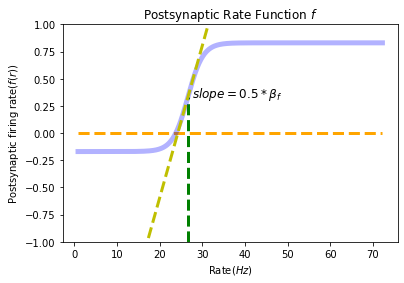

In [28]:
c=0.005
N=50000
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
f=np.zeros(900)
r=np.zeros(900)
count=0
for epsilon in np.arange(-3,6,0.01):
    r[count]=r_m/(1+np.exp(-beta_T*(epsilon-h_0)))
    f[count]=0.5*(2*q_f-1+np.tanh(beta_f*(r[count]-x_f)))
    count=count+1
plt.figure()
plt.title('Postsynaptic Rate Function $f$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($f(r)$)')
plt.ylim(-1,1)
plt.plot(r,f,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_f-1)),colors="g",linestyles="dashed",linewidth=3)
f_line=np.zeros(900)
f_slope=0.5*beta_f
for count in range(900):
    f_line[count]=f_slope*(r[count]-x_f)+0.5*(2*q_f-1)
plt.plot(r,f_line,'--y',linewidth=3)
plt.text(x_f+1,(0.5*(2*q_f-1)),r'$slope=0.5*\beta_f$',size='12')

Text(27.6, -0.5, '$slope=0.5*\\beta_g$')

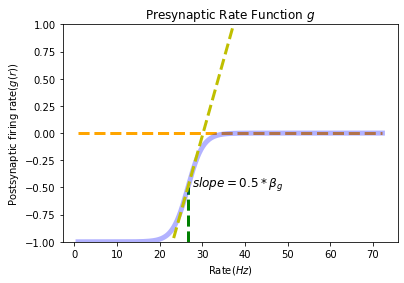

In [29]:
q_g=0
beta_g=beta_f
x_g=x_f
count=0
g=np.zeros(900)
for epsilon in np.arange(-3,6,0.01):
    g[count]=0.5*(2*q_g-1+np.tanh(beta_g*(r[count]-x_g)))
    count=count+1
plt.figure()
plt.title('Presynaptic Rate Function $g$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($g(r)$)')
plt.ylim(-1,1)
plt.plot(r,g,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_g-1)),colors="g",linestyles="dashed",linewidth=3)
g_line=np.zeros(900)
g_slope=0.5*beta_f
for count in range(900):
    g_line[count]=g_slope*(r[count]-x_g)+0.5*(2*q_g-1)
plt.plot(r,g_line,'--y',linewidth=3)
plt.text(x_g+1,(0.5*(2*q_g-1)),r'$slope=0.5*\beta_g$',size='12')

In [30]:
p=2
######
N=14
######
C=np.zeros((N,N))
epsilon=np.random.normal(0,1,size=(p,N))
r=r_m/(1+np.exp(-beta_T*(epsilon-h_0)))
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<0.005:
            C[i,j]=1
print(C)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
for i in range(N):
    for j in range(N):
        synaptic_input=0
        for k in range(p):
            synaptic_input=synaptic_input+f(r[k,i])*g(r[k,j])
        J[i,j]=A*C[i,j]/c/N*synaptic_input
print(J)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.     

[[ 8.47655579 22.81779024  7.8760765  17.45563673  1.97283016  6.7157253
   9.1357005   3.73470638 12.68945992  6.70400524 12.02874973  2.49828717
  21.80958839  5.84715664]
 [ 4.48190097  7.80688923  4.34829154 10.62077843  3.76705292 19.77340399
   7.52934207  8.54911336  3.90136706 27.48963028  2.07392873  1.90917557
  17.84134903 13.55667786]]
